In [1]:
from POSEIDON.utility import read_high_res_data
from POSEIDON.high_res import fit_uncertainties
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [23]:
wl_grid, data_raw = pickle.load(open("data/data_raw.pic", "rb"))
Ndet, Nphi, Npix = data_raw.shape
data_raw[data_raw < 0] = 0

In [3]:
C_norm = np.zeros(data_raw.shape)
for k in range(Ndet):
    order = data_raw[k]

    median = np.median(order, axis=0)
    median[median == 0] = np.mean(median)
    order_norm = order / median
    C_norm[k] = order_norm

In [4]:
from scipy.ndimage import gaussian_filter1d, median_filter

for det in range(Ndet):
    for phi in range(Nphi):
        C_norm[det][phi] = median_filter(C_norm[det][phi], size=501)

for det in range(Ndet):
    for phi in range(Nphi):
        C_norm[det][phi] = gaussian_filter1d(C_norm[det][phi], sigma=100)

In [34]:
data_blaze_corrected = data_raw / C_norm

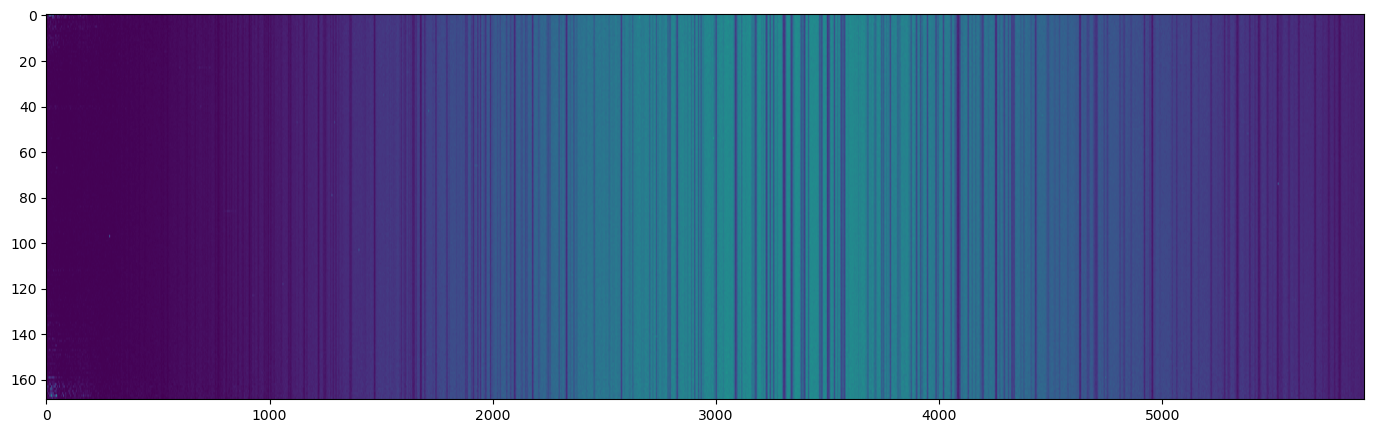

In [35]:
plt.figure(figsize=(17, 5))
plt.imshow(data_blaze_corrected[0], aspect="auto")

In [36]:
uncertainties = fit_uncertainties(data_blaze_corrected, NPC=5)

/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/POSEIDON/high_res.py:568: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(a * data_raw[i] + b)


0.5875459458783303 201.63176679700598
0.6912375802475921 104.4685974196284
0.6555292195323814 111.89691896677326
0.6108757018662229 114.83012883159022
0.48209958281701504 139.70012561066883
0.4386682327649015 144.1453224423207
0.42827335603136973 132.47407428168015
0.4548574862647677 87.7467256503339
0.45086461246583903 77.67888704294147
0.4585977725881202 71.74306350500423
0.4599526077805096 70.45817509355805
0.45401936745686367 72.65576351056914
0.4617297672804983 61.53869763225647
0.45972742924878973 71.88339210035585
0.459231555740259 75.0337230243514
0.45895324581961017 78.88652520010638
0.4596340364510896 81.77809398267699
0.45751104682556654 121.02388334443131
0.4698068960668071 64.00293851992951
0.46902063260781707 80.4061154571533
0.4682070514751737 102.8310710878686
0.46416724708061674 111.11607176320001
0.4695672191508914 105.78864804718307
0.4766884713178283 100.73514818808883
0.4659674317410185 125.15300679381053
0.4782258136720532 122.35356346288222
0.4813525327076838 115

In [15]:
import pickle

output_path = "./CC_output/WASP-76b/"  # Could modify output path here.
data_path = "./data/WASP-76b/"
data = data_blaze_corrected

In [10]:
from POSEIDON.high_res import fast_filter

for i in range(len(data)):
    order = data[i]

    median = np.median(order, axis=0)
    median[median == 0] = np.mean(median)
    order_norm = order / median

    uncertainty = uncertainties[i]

    uncertainty_norm = uncertainty / median

    uncertainties[i] = uncertainty_norm
    data[i] = order_norm

residuals, Us = fast_filter(data, uncertainties, N_iter=15)

In [33]:
uncertainties

array([[[5.71189269e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.62808099e-02, 8.61236136e-02, 8.76109451e-02],
        [4.75741951e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.71912828e-02, 8.88699645e-02, 9.01607097e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.77949317e-02, 8.88892963e-02, 9.05091605e-02],
        ...,
        [6.06057263e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.70415011e-02, 8.81423922e-02, 9.07960735e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.80103163e-02, 8.60294608e-02, 8.68866654e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.76497789e-02, 8.84007687e-02, 9.03190735e-02]],

       [[4.79657001e+06, 2.30686253e+00, 2.39619089e+00, ...,
         6.17510069e-02, 6.04577879e-02, 6.01925887e-02],
        [4.79657001e+06, 2.30769638e+00, 2.39421843e+00, ...,
         6.16715214e-02, 6.02137841e-02, 5.99686587e-02],
        [4.96282936e+00, 

In [16]:
pickle.dump(uncertainties, open(data_path + "/uncertainties.pic", "wb"))

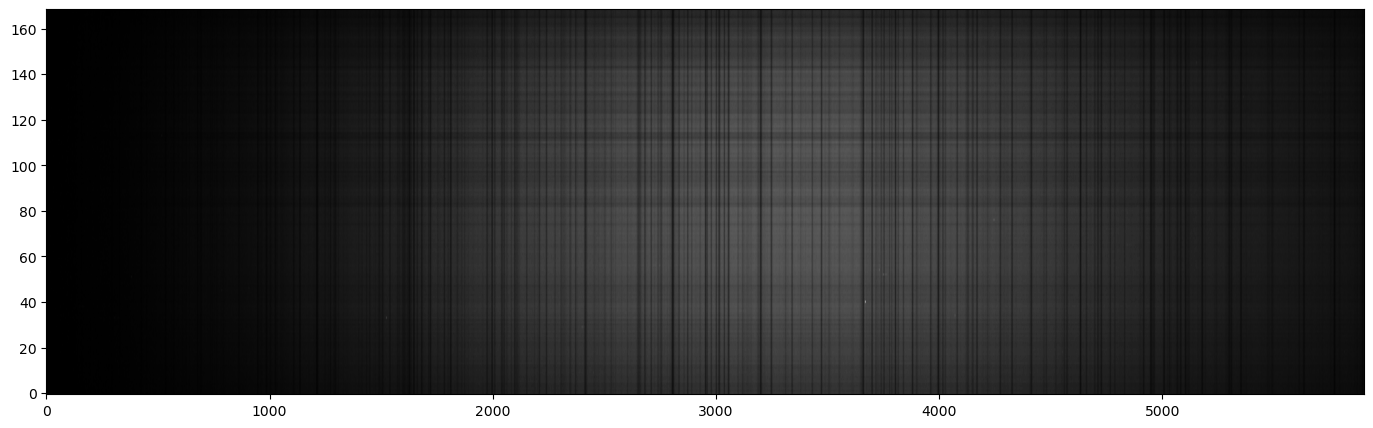

In [25]:
plt.figure(figsize=(17, 5))
plt.imshow(data_raw[2], aspect="auto", origin="lower", cmap="gray")

In [12]:
Bs = np.zeros((Ndet, Nphi, Nphi))

for j in range(Ndet):
    U = Us[j]
    L = np.diag(1 / np.mean(uncertainties[j], axis=-1))
    B = U @ np.linalg.pinv(L @ U) @ L
    Bs[j] = B

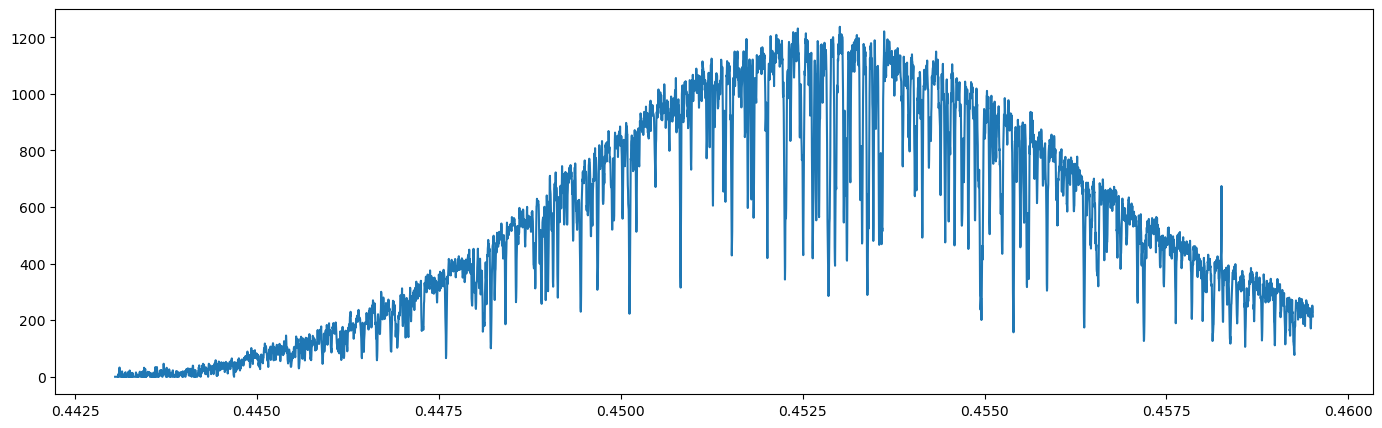

In [24]:
plt.figure(figsize=(17, 5))
plt.plot(wl_grid[0], data_raw[0][52])
plt.ticklabel_format(useOffset=False)

In [14]:
pickle.dump([Bs, residuals], open(data_path + "/fast_filter.pic", "wb"))

In [2]:
data_old = read_high_res_data("./data/WASP-76b-old/")

In [3]:
data = read_high_res_data("./data/WASP-76b/")

In [9]:
data_old["residuals"]

array([[[ 2.06445938e+01, -1.09717865e+00, -3.37749529e-01, ...,
         -4.94947405e-02, -3.46669293e-02,  2.58394050e-03],
        [-1.32823637e+01, -5.95586428e-01, -2.21195475e-01, ...,
          6.85034932e-02,  4.23828985e-02, -2.20692963e-05],
        [-2.52390410e+01, -8.62026841e-02,  4.90467595e-02, ...,
         -5.88584042e-02, -8.96730071e-02, -1.24879398e-01],
        ...,
        [-8.81864860e+00, -5.92181725e-01, -8.90360073e-01, ...,
         -1.30620483e-02,  6.70958287e-03,  4.99919907e-03],
        [-2.05099942e+02, -1.85862643e+00, -2.83378200e+00, ...,
         -1.38647675e-02,  2.33332621e-03,  9.73433967e-03],
        [ 2.04520309e+00, -5.45431361e-01, -1.33647044e-01, ...,
         -4.59785034e-03, -1.52103974e-02, -5.31488425e-02]],

       [[-2.55565750e+01, -5.27190197e-01, -8.26654581e-01, ...,
         -2.32635199e-03, -2.57763498e-02,  3.43171788e-03],
        [-5.27683627e-01,  1.03784742e+00, -9.01917926e-02, ...,
          2.36293848e-02,  1.97357380e

In [7]:
data["uncertainties"]

array([[[5.71189269e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.62808099e-02, 8.61236136e-02, 8.76109451e-02],
        [4.75741951e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.71912828e-02, 8.88699645e-02, 9.01607097e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.77949317e-02, 8.88892963e-02, 9.05091605e-02],
        ...,
        [6.06057263e+00, 2.05526199e+04, 2.05526199e+04, ...,
         8.70415011e-02, 8.81423922e-02, 9.07960735e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.80103163e-02, 8.60294608e-02, 8.68866654e-02],
        [3.00219133e+06, 2.05526199e+04, 2.05526199e+04, ...,
         8.76497789e-02, 8.84007687e-02, 9.03190735e-02]],

       [[4.79657001e+06, 2.30686253e+00, 2.39619089e+00, ...,
         6.17510069e-02, 6.04577879e-02, 6.01925887e-02],
        [4.79657001e+06, 2.30769638e+00, 2.39421843e+00, ...,
         6.16715214e-02, 6.02137841e-02, 5.99686587e-02],
        [4.96282936e+00, 